In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\Tharakh George\OneDrive\Desktop\covid_19.csv',parse_dates=['Date'])
data.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [3]:
data.describe(include=object)

Province/State Country/Region WHO Region
count                          14664          49068      49068
unique                            78            187          6
top     Australian Capital Territory          China     Europe
freq                             188           6204      15040

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [6]:
data.rename(columns={'Province/State':'state',
                    'Country/Region':'country',
                    'Lat':'lat',
                     'Long':'long',
                    'Date':'date',
                    'Confirmed':'confirmed',
                    'Deaths':'deaths',
                    'Recovered':'recovered',
                    'Active':'active'},inplace=True)

In [7]:
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']
data.head()

state      country       lat       long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800 2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900 2020-01-22          0       0   

   recovered  active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

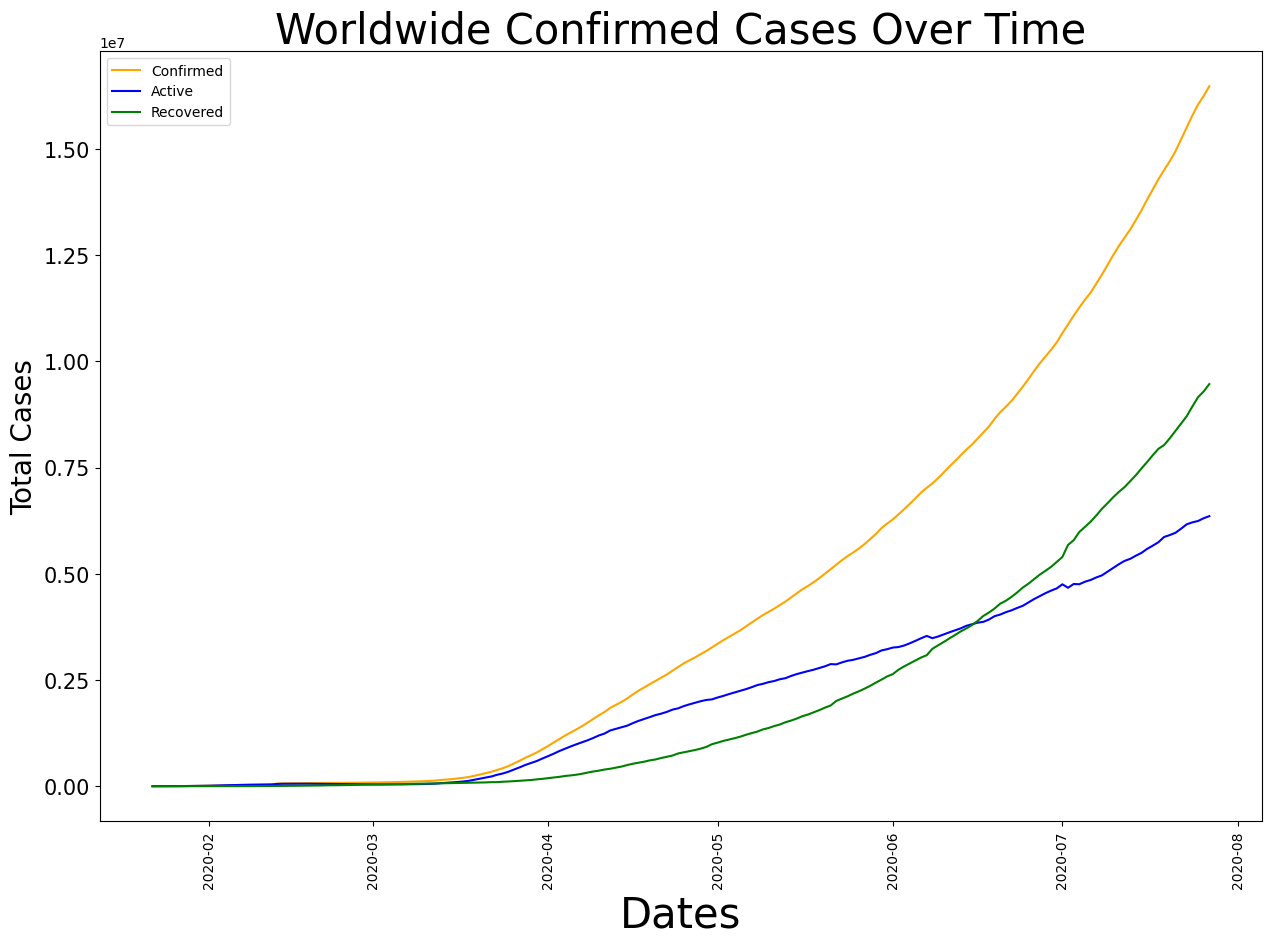

In [8]:
plt.figure(figsize=(15,10))
data_summary=data.groupby('date')['confirmed','active','deaths','recovered'].sum().reset_index()
data_summary['date'] = pd.to_datetime(data_summary['date'])

plt.plot(data_summary['date'],data_summary.confirmed,color='orange',label='Confirmed')
plt.plot(data_summary['date'],data_summary.active,color='blue',label='Active')
plt.plot(data_summary['date'],data_summary.recovered,color='green',label='Recovered')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=20)
plt.legend(loc='best')
plt.show()

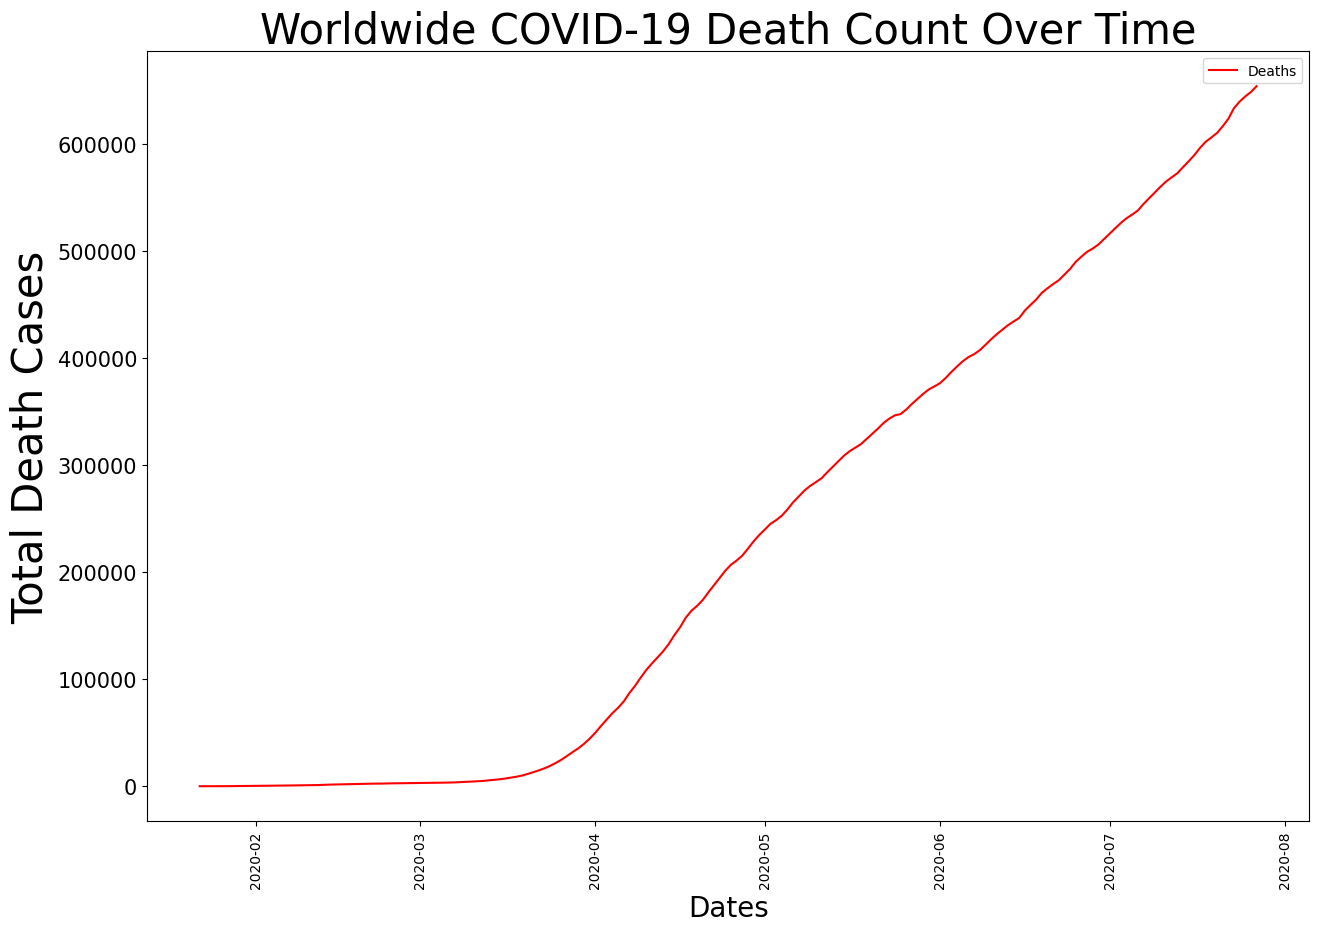

In [9]:
plt.figure(figsize=(15,10))

plt.plot(data_summary['date'],data_summary.deaths,color='red',label='Deaths')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.title("Worldwide COVID-19 Death Count Over Time" , fontsize = 30)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Total Death Cases',fontsize=30)
plt.legend(loc='best')
plt.show()

# Worldwide COVID-19 Cases Current Status:

In [10]:
#to find all the cases on last date value

top = data[data['date']==data['date'].max()]

## to find aggregate cases for each country

country_summary = top.groupby('country')['confirmed','active','deaths','recovered'].sum().reset_index()
country_summary.head()

country  confirmed  active  deaths  recovered
0  Afghanistan      36263    9796    1269      25198
1      Albania       4880    1991     144       2745
2      Algeria      27973    7973    1163      18837
3      Andorra        907      52      52        803
4       Angola        950     667      41        242

# (1) Confirmed Cases

In [11]:
 figure = px.choropleth(country_summary, locations="country", 
                    locationmode='country names', color="confirmed", 
                    hover_name="country", range_color=[1,500000], 
                    color_continuous_scale="Peach", 
                    title='Countries - Total Confirmed Cases')
figure.show()

In [12]:
fig = px.scatter_mapbox(top, lat="lat", lon="long", hover_name="country", hover_data=["country","confirmed"],
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300,title='Confirmed count of each country' )
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [13]:
country_summary['size'] = country_summary['confirmed'].pow(0.2)
fig = px.scatter_geo(country_summary, locations="country",locationmode='country names', color="confirmed",
                     hover_name="country", size="size",hover_data = ['country','confirmed'],
                     projection="natural earth",title='Confirmed cases count of each country')
fig.show()

In [14]:
### Top 20 countries with highest confirmed cases
confirmed_summary=country_summary.nlargest(20,'confirmed')[['country','confirmed']].reset_index(drop=True)
confirmed_summary

country  confirmed
0               US    4290259
1           Brazil    2442375
2            India    1480073
3           Russia     816680
4     South Africa     452529
5           Mexico     395489
6             Peru     389717
7            Chile     347923
8   United Kingdom     301708
9             Iran     293606
10        Pakistan     274289
11           Spain     272421
12    Saudi Arabia     268934
13        Colombia     257101
14           Italy     246286
15          Turkey     227019
16      Bangladesh     226225
17          France     220352
18         Germany     207112
19       Argentina     167416

Text(0, 0.5, 'Country')

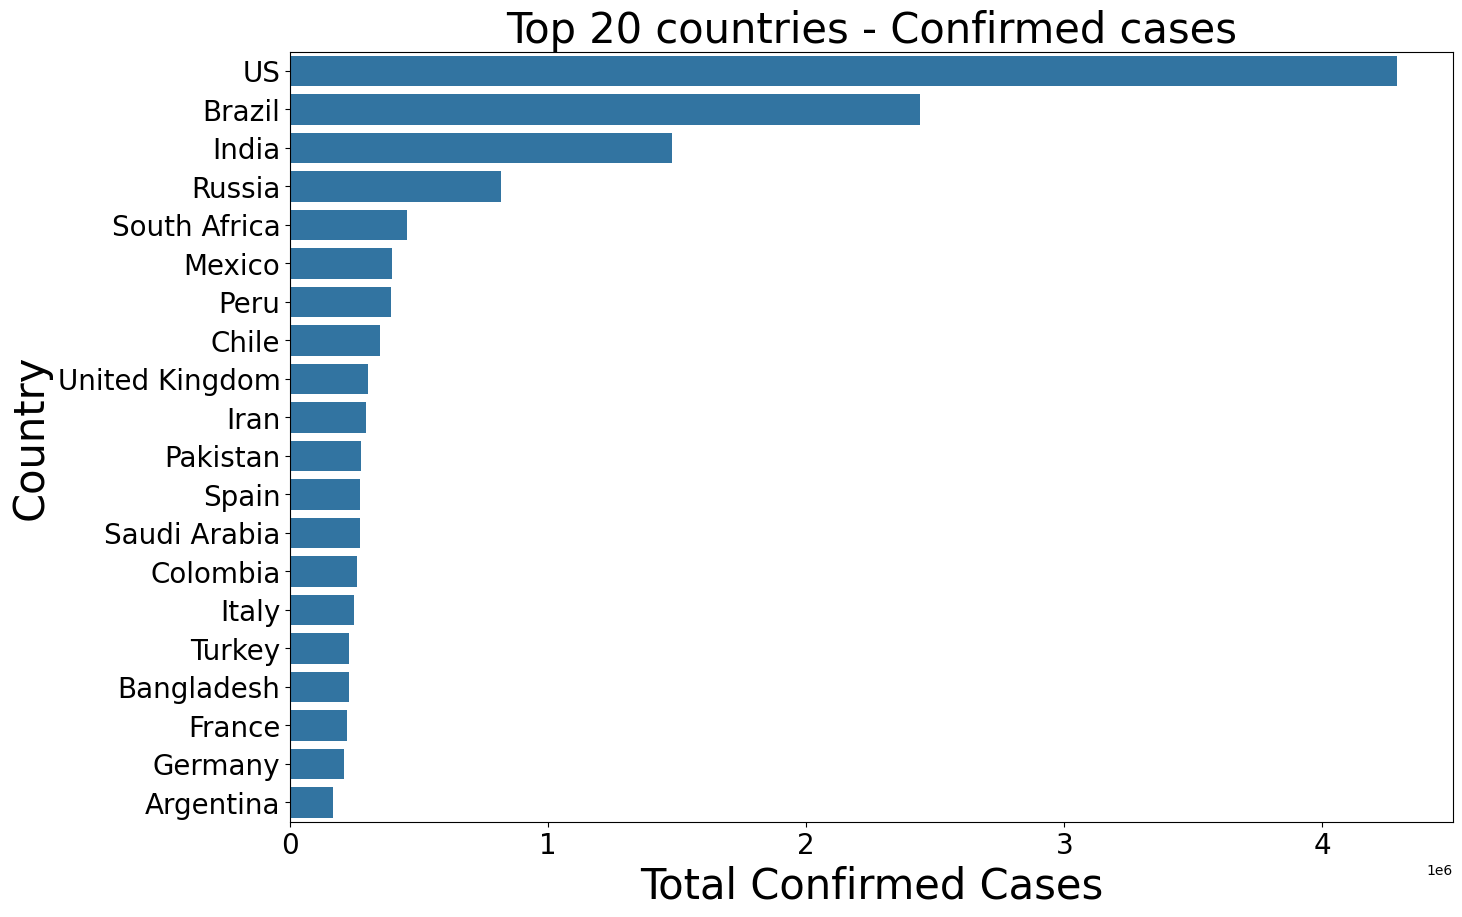

In [15]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries - Confirmed cases', fontsize=30)
sns.barplot(x=confirmed_summary.confirmed, y=confirmed_summary.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Total Confirmed Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)

In [16]:
### Top 20 countries with lowest confirmed cases
confirmed_summary=country_summary.nsmallest(20,'confirmed')[['country','confirmed']].reset_index(drop=True)
confirmed_summary

country  confirmed
0                     Western Sahara         10
1                           Holy See         12
2                          Greenland         14
3              Saint Kitts and Nevis         17
4                           Dominica         18
5                               Laos         20
6                            Grenada         23
7                        Saint Lucia         24
8                        Timor-Leste         24
9                               Fiji         27
10                            Belize         48
11  Saint Vincent and the Grenadines         52
12                  Papua New Guinea         62
13               Antigua and Barbuda         86
14                     Liechtenstein         86
15                            Bhutan         99
16                          Barbados        110
17                        Seychelles        114
18                            Monaco        116
19                            Brunei        141

# (2) Active Cases

In [17]:
 figure = px.choropleth(country_summary, locations="country", 
                    locationmode='country names', color="active", 
                    hover_name="country", range_color=[1,500000], 
                    color_continuous_scale="Peach", 
                    title='Countries - Total Active Cases')
figure.show()

In [18]:
fig = px.scatter_mapbox(top, lat="lat", lon="long", hover_name="country", hover_data=["country","active"],
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300,title='Active cases count of each country' )
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [19]:
country_summary['size'] = country_summary['active'].pow(0.2)
fig = px.scatter_geo(country_summary, locations="country",locationmode='country names', color="active",
                     hover_name="country", size="size",hover_data = ['country','active'],
                     projection="natural earth",title='Active cases count of each country')
fig.show()

In [20]:
### Top 20 countries with highest active cases
active_summary=country_summary.nlargest(20,'active')[['country','active']].reset_index(drop=True)
active_summary

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

Text(0, 0.5, 'Country')

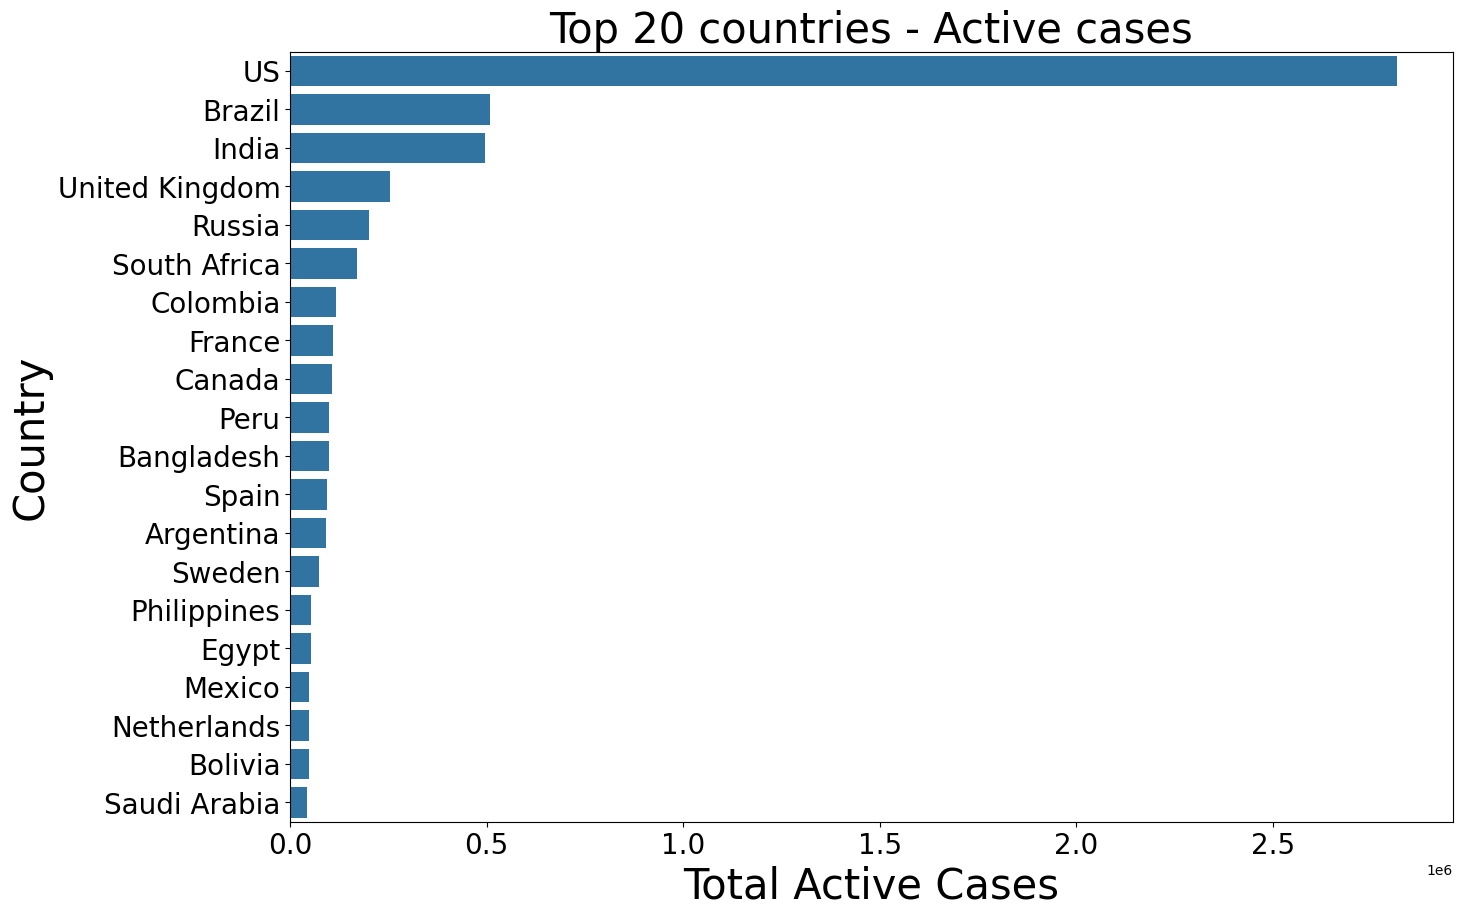

In [21]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries - Active cases', fontsize=30)
sns.barplot(x=active_summary.active, y=active_summary.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Total Active Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)

In [22]:
### Top 20 countries with lowest active cases
active_summary=country_summary.nsmallest(20,'active')[['country','active']].reset_index(drop=True)
active_summary

country  active
0                             Brunei       0
1                           Dominica       0
2                            Grenada       0
3                           Holy See       0
4                         San Marino       0
5                          Greenland       1
6                               Laos       1
7                     Western Sahara       1
8                          Mauritius       2
9              Saint Kitts and Nevis       2
10                       Saint Lucia       2
11                     Liechtenstein       4
12                            Monaco       8
13                          Barbados       9
14                              Fiji       9
15               Trinidad and Tobago      12
16                            Bhutan      13
17  Saint Vincent and the Grenadines      13
18                           Taiwan*      15
19               Antigua and Barbuda      18

# (3) Death Cases

In [23]:
 figure = px.choropleth(country_summary, locations="country", 
                    locationmode='country names', color="deaths", 
                    hover_name="country", range_color=[1,500000], 
                    color_continuous_scale="Peach", 
                    title='Countries - Total Deaths Cases')
figure.show()

In [24]:
fig = px.scatter_mapbox(top, lat="lat", lon="long", hover_name="country", hover_data=["country","deaths"],
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300,title='Deaths cases count of each country' )
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [25]:
country_summary['size'] = country_summary['deaths'].pow(0.2)
fig = px.scatter_geo(country_summary, locations="country",locationmode='country names', color="deaths",
                     hover_name="country", size="size",hover_data = ['country','deaths'],
                     projection="natural earth",title='Deaths cases count of each country')
fig.show()

In [26]:
### Top 20 countries with highest deaths cases
deaths_summary=country_summary.nlargest(20,'deaths')[['country','deaths']].reset_index(drop=True)
deaths_summary

country  deaths
0               US  148011
1           Brazil   87618
2   United Kingdom   45844
3           Mexico   44022
4            Italy   35112
5            India   33408
6           France   30212
7            Spain   28432
8             Peru   18418
9             Iran   15912
10          Russia   13334
11         Belgium    9822
12           Chile    9187
13         Germany    9125
14          Canada    8944
15        Colombia    8777
16    South Africa    7067
17     Netherlands    6160
18        Pakistan    5842
19          Sweden    5700

Text(0, 0.5, 'Country')

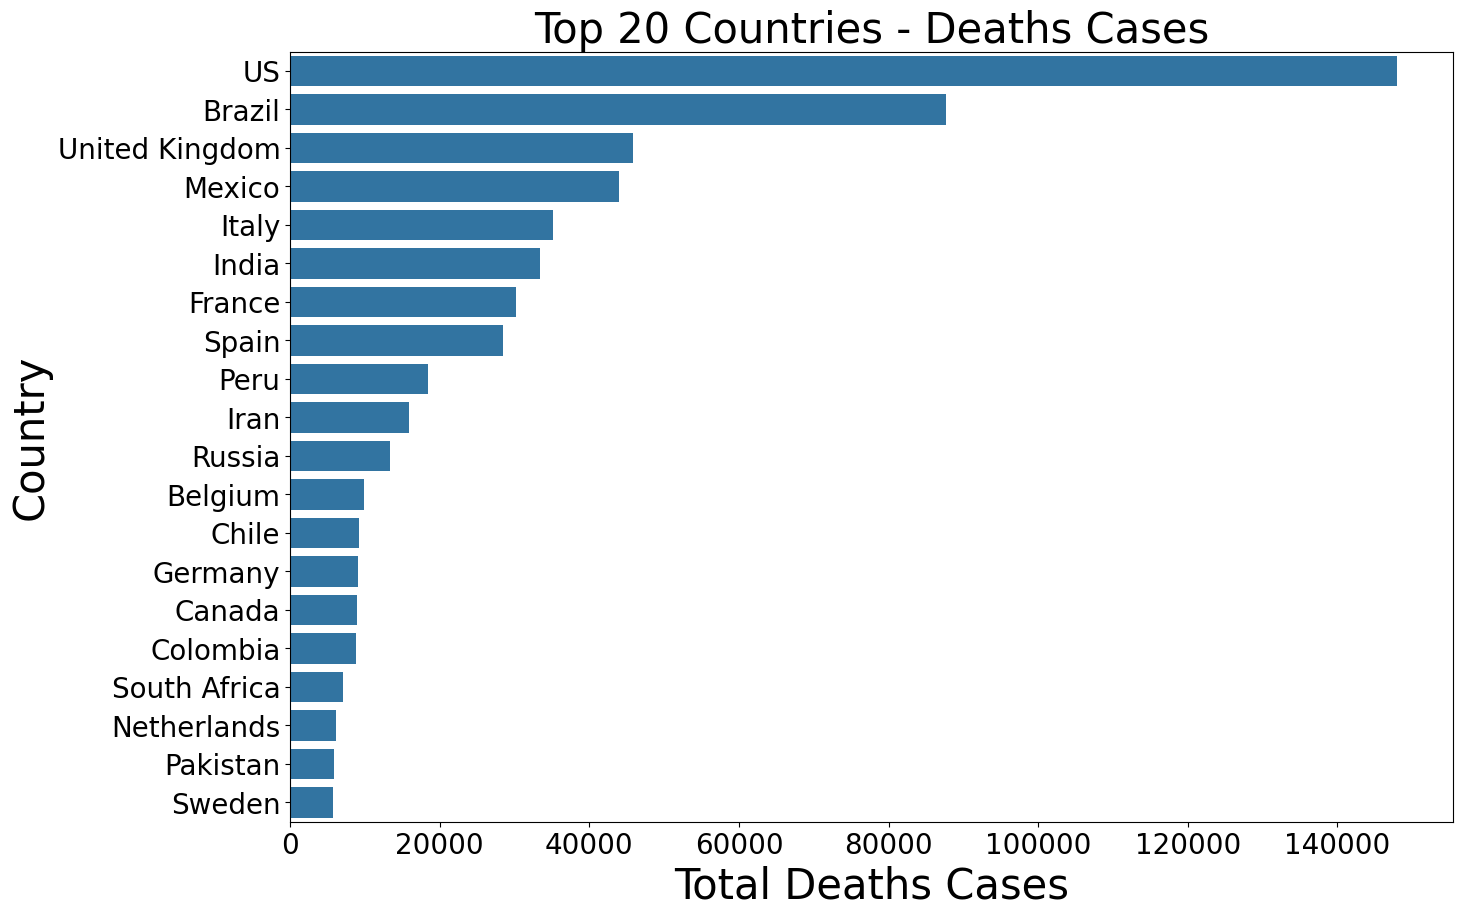

In [27]:
plt.figure(figsize=(15,10))
plt.title('Top 20 Countries - Deaths Cases', fontsize=30)
sns.barplot(x=deaths_summary.deaths, y=deaths_summary.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Total Deaths Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)

In [28]:
### Top 20 countries with lowest deaths cases
deaths_summary=country_summary.nsmallest(20,'deaths')[['country','deaths']].reset_index(drop=True)
deaths_summary

country  deaths
0                             Bhutan       0
1                           Cambodia       0
2                           Dominica       0
3                            Eritrea       0
4                               Fiji       0
5                          Greenland       0
6                            Grenada       0
7                           Holy See       0
8                               Laos       0
9                           Mongolia       0
10                  Papua New Guinea       0
11             Saint Kitts and Nevis       0
12                       Saint Lucia       0
13  Saint Vincent and the Grenadines       0
14                        Seychelles       0
15                       Timor-Leste       0
16                           Vietnam       0
17                           Burundi       1
18                     Liechtenstein       1
19                    Western Sahara       1

# (4) Recovered Cases

In [29]:
 figure = px.choropleth(country_summary, locations="country", 
                    locationmode='country names', color="recovered", 
                    hover_name="country", range_color=[1,500000], 
                    color_continuous_scale="Peach", 
                    title='Countries - Total Recovered Cases')
figure.show()

In [30]:
fig = px.scatter_mapbox(top, lat="lat", lon="long", hover_name="country", hover_data=["country","recovered"],
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300,title='Recovered cases count of each country' )
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [31]:
country_summary['size'] = country_summary['recovered'].pow(0.2)
fig = px.scatter_geo(country_summary, locations="country",locationmode='country names', color="recovered",
                     hover_name="country", size="size",hover_data = ['country','recovered'],
                     projection="natural earth",title='Recovered cases count of each country')
fig.show()

In [32]:
### Top 20 countries with highest recovered cases
recovered_summary=country_summary.nlargest(20,'recovered')[['country','recovered']].reset_index(drop=True)
recovered_summary

country  recovered
0         Brazil    1846641
1             US    1325804
2          India     951166
3         Russia     602249
4          Chile     319954
5         Mexico     303810
6   South Africa     274925
7           Peru     272547
8           Iran     255144
9       Pakistan     241026
10  Saudi Arabia     222936
11        Turkey     210469
12         Italy     198593
13       Germany     190314
14         Spain     150376
15      Colombia     131161
16    Bangladesh     125683
17         Qatar     106328
18        France      81212
19         China      78869

Text(0, 0.5, 'Country')

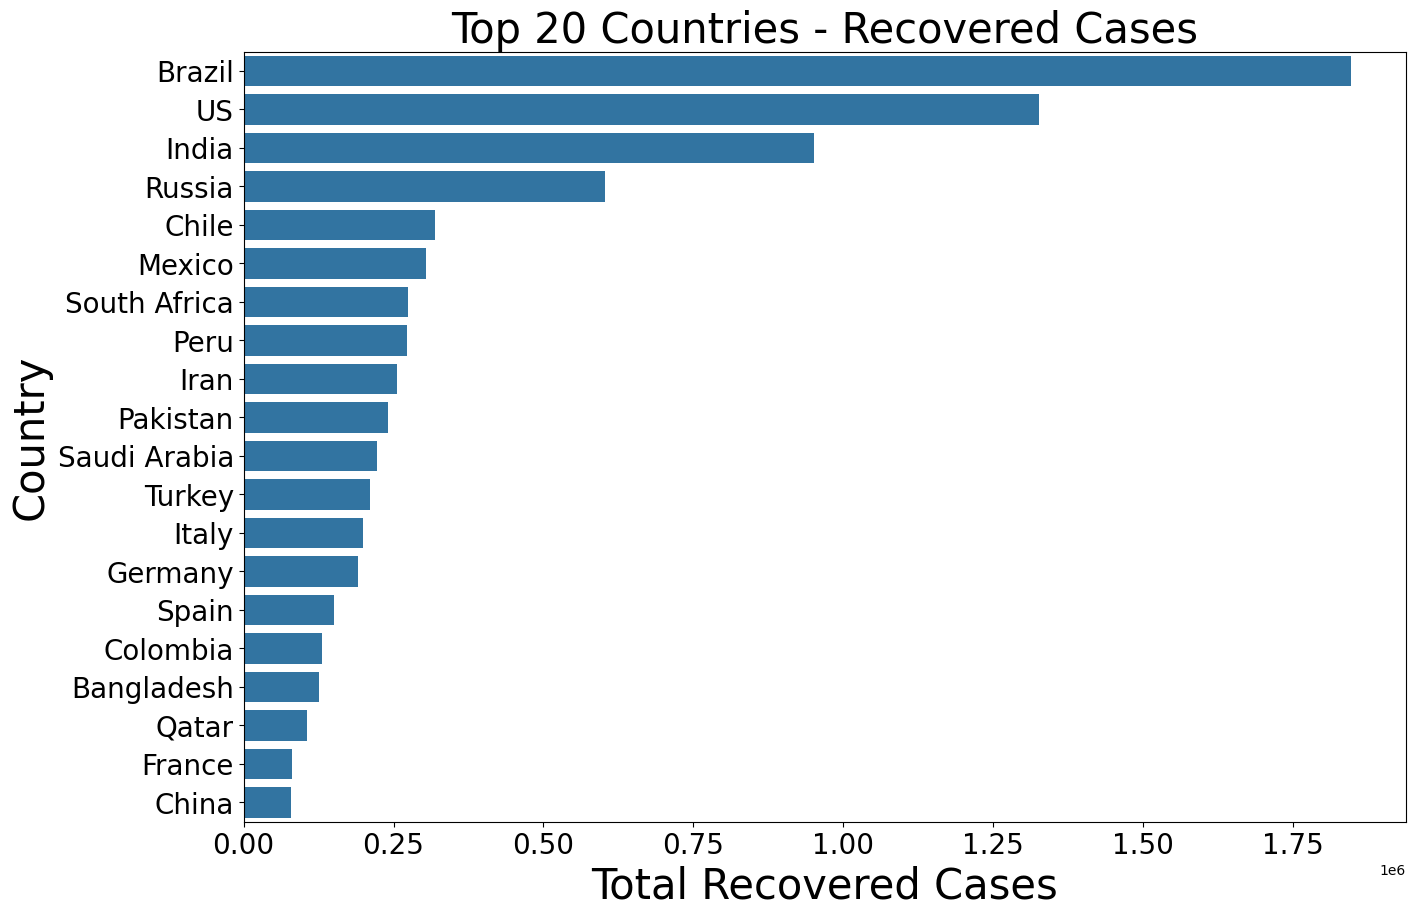

In [33]:
plt.figure(figsize=(15,10))
plt.title('Top 20 Countries - Recovered Cases', fontsize=30)
sns.barplot(x=recovered_summary.recovered, y=recovered_summary.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Total Recovered Cases',fontsize=30)
plt.ylabel('Country',fontsize=30)

# Country Comparison - Brazil, India, United Kingdom, US

In [34]:
Brazil=data[data.country=='Brazil']
Brazil=Brazil.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
India=data[data.country=='India']
India=India.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
UK=data[data.country=='United Kingdom']
UK=UK.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
US=data[data.country=='US']
US=US.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()

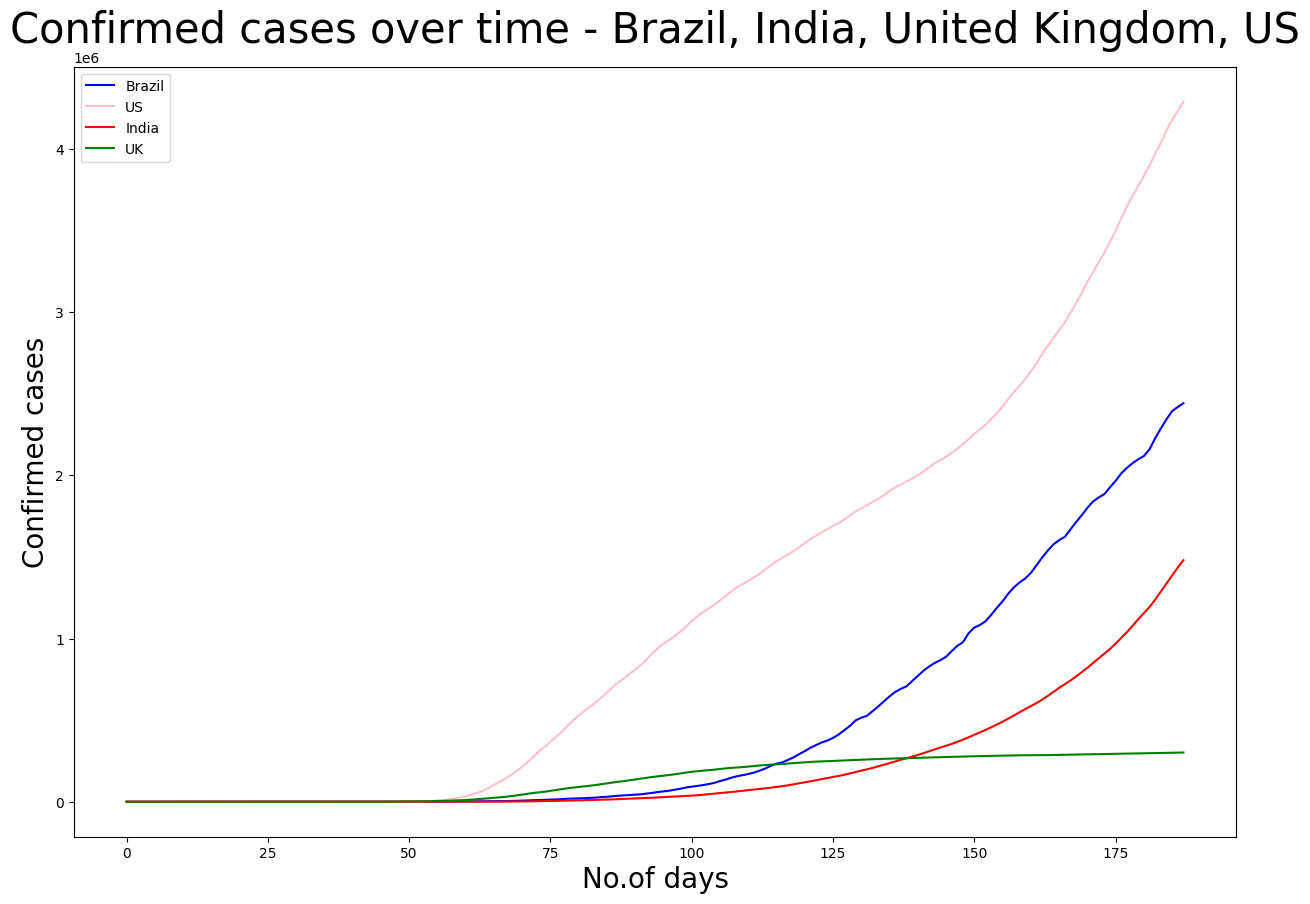

In [35]:
plt.figure(figsize=(15,10))
plt.plot(Brazil.index,Brazil.confirmed,color="Blue",label='Brazil')
plt.plot(US.index,US.confirmed,color="Pink",label='US')
plt.plot(India.index,India.confirmed,color="Red",label='India')
plt.plot(UK.index,UK.confirmed,color="Green",label='UK')
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time - Brazil, India, United Kingdom, US',fontsize=30)
plt.legend(loc='best')
plt.show()

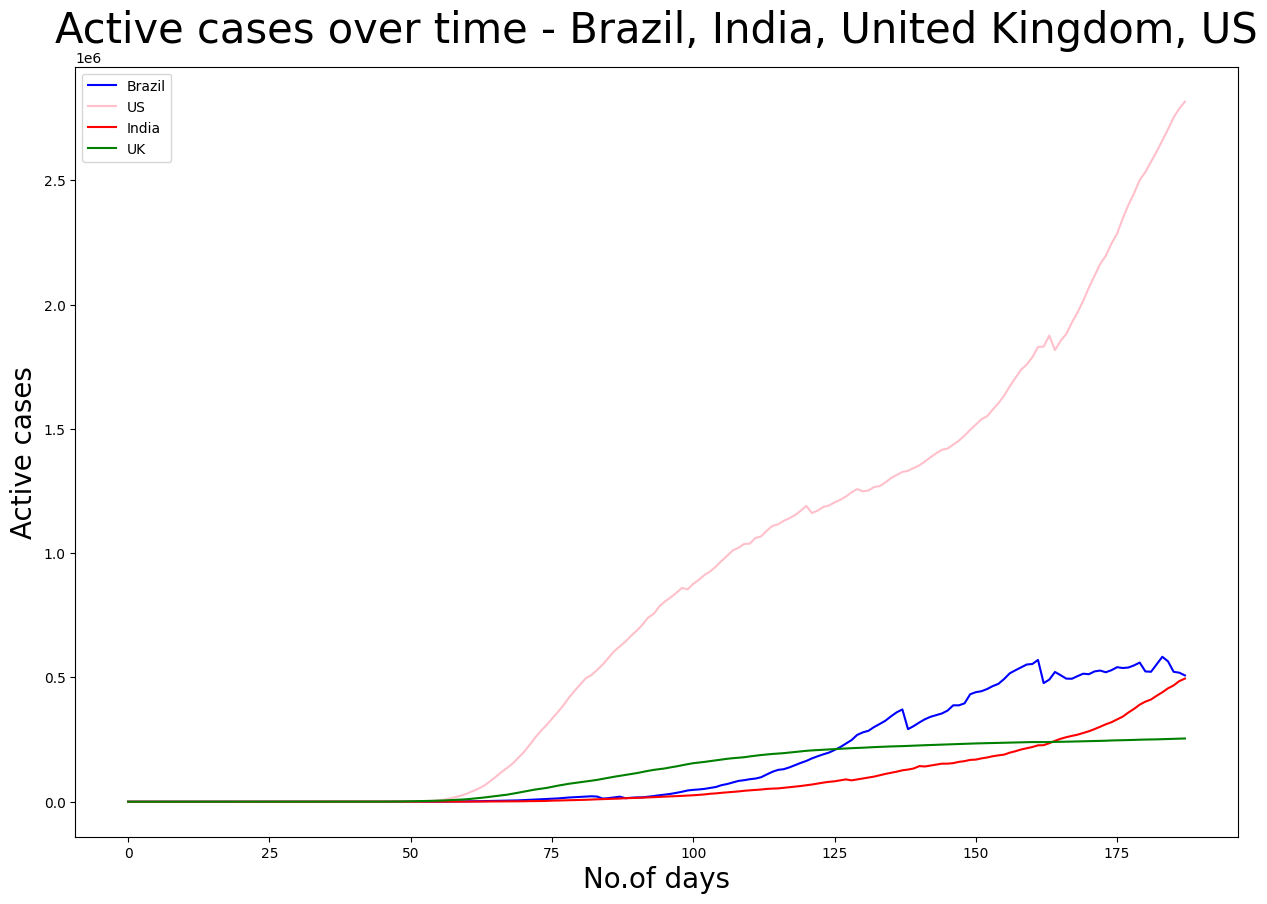

In [36]:
plt.figure(figsize=(15,10))
plt.plot(Brazil.index,Brazil.active,color="Blue",label='Brazil')
plt.plot(US.index,US.active,color="Pink",label='US')
plt.plot(India.index,India.active,color="Red",label='India')
plt.plot(UK.index,UK.active,color="Green",label='UK')
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Active cases',fontsize=20)
plt.title('Active cases over time - Brazil, India, United Kingdom, US',fontsize=30)
plt.legend(loc='best')
plt.show()

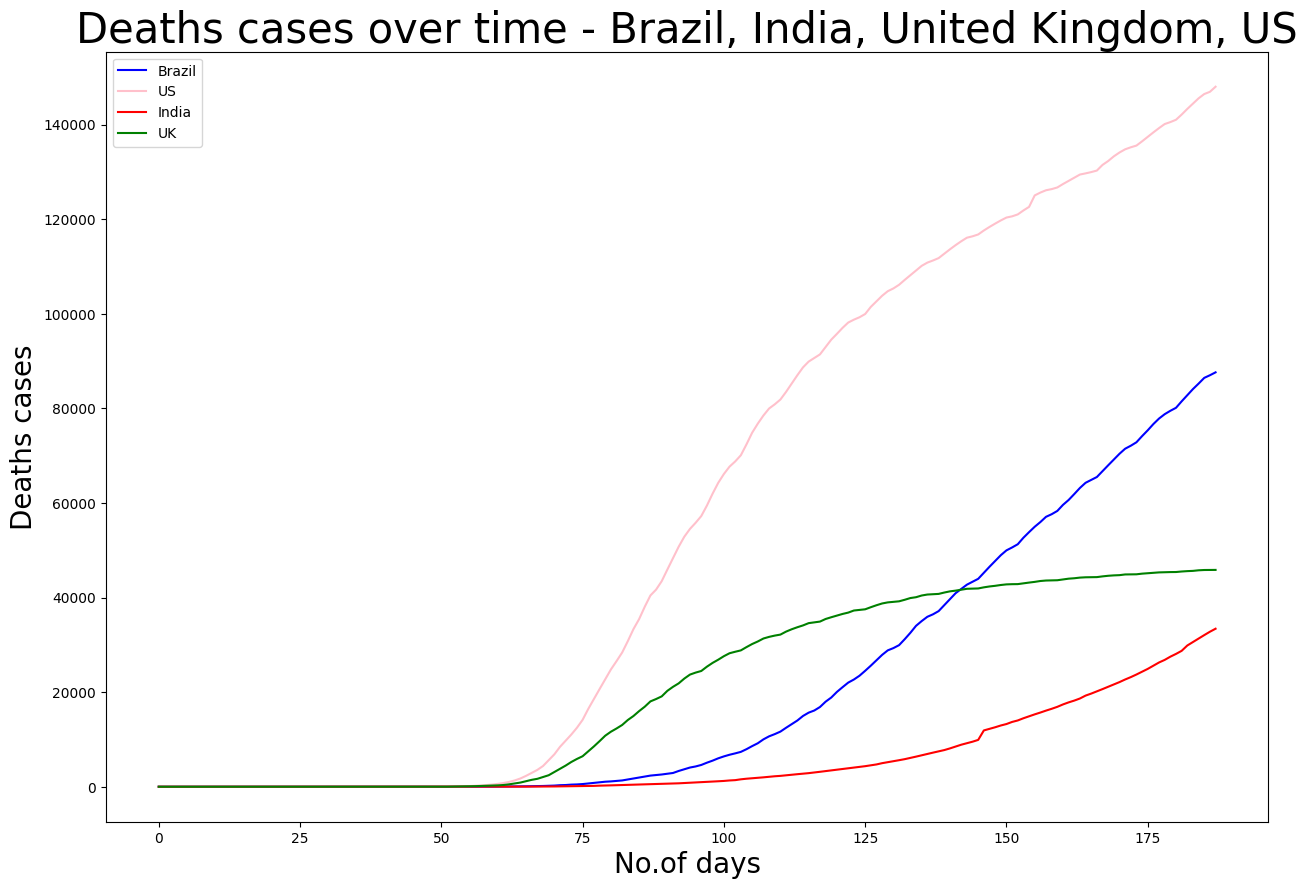

In [37]:
plt.figure(figsize=(15,10))
plt.plot(Brazil.index,Brazil.deaths,color="Blue",label='Brazil')
plt.plot(US.index,US.deaths,color="Pink",label='US')
plt.plot(India.index,India.deaths,color="Red",label='India')
plt.plot(UK.index,UK.deaths,color="Green",label='UK')
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Deaths cases',fontsize=20)
plt.title('Deaths cases over time - Brazil, India, United Kingdom, US',fontsize=30)
plt.legend(loc='best')
plt.show()

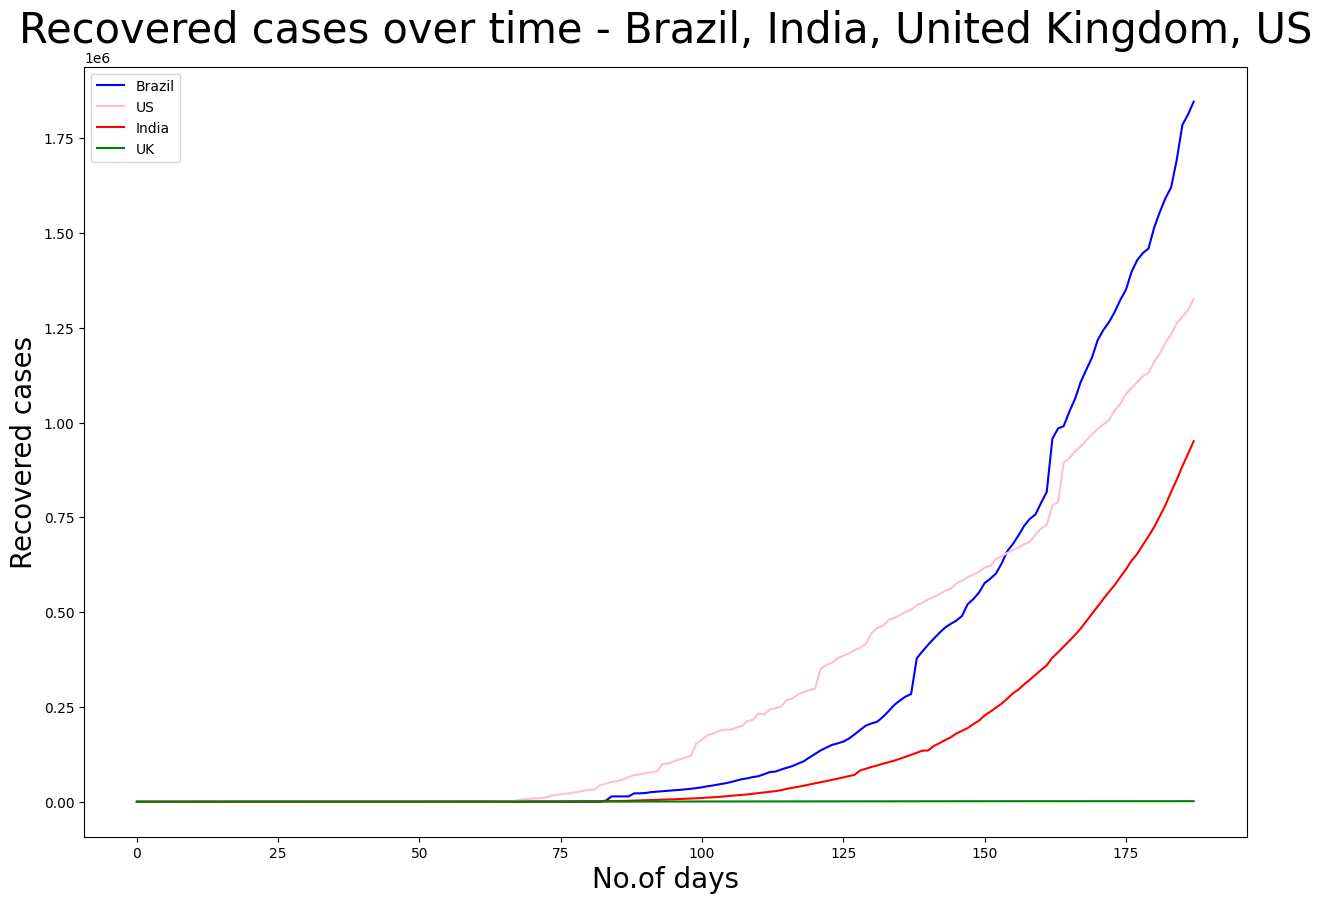

In [38]:
plt.figure(figsize=(15,10))
plt.plot(Brazil.index,Brazil.recovered,color="Blue",label='Brazil')
plt.plot(US.index,US.recovered,color="Pink",label='US')
plt.plot(India.index,India.recovered,color="Red",label='India')
plt.plot(UK.index,UK.recovered,color="Green",label='UK')
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Recovered cases',fontsize=20)
plt.title('Recovered cases over time - Brazil, India, United Kingdom, US',fontsize=30)
plt.legend(loc='best')
plt.show()

# Top 20 countries having the worst and lowest mortality rate :

In [39]:
country_summary.drop(columns='size',inplace=True)

In [40]:
country_summary['recovery percentage'] =  round(((country_summary['recovered']) / (country_summary['confirmed'])) * 100 , 2)
country_summary['death percentage'] =  round(((country_summary['deaths']) / (country_summary['confirmed'])) * 100 , 2)
country_summary.head()

country  confirmed  active  deaths  recovered  recovery percentage  \
0  Afghanistan      36263    9796    1269      25198                69.49   
1      Albania       4880    1991     144       2745                56.25   
2      Algeria      27973    7973    1163      18837                67.34   
3      Andorra        907      52      52        803                88.53   
4       Angola        950     667      41        242                25.47   

   death percentage  
0              3.50  
1              2.95  
2              4.16  
3              5.73  
4              4.32

In [41]:
### top 20 countries with highest mortality rate
worst_mortality=country_summary.nlargest(20,'death percentage').reset_index(drop=True)
worst_mortality

country  confirmed  active  deaths  recovered  recovery percentage  \
0            Yemen       1691     375     483        833                49.26   
1   United Kingdom     301708  254427   45844       1437                 0.48   
2          Belgium      66428   39154    9822      17452                26.27   
3            Italy     246286   12581   35112     198593                80.64   
4           France     220352  108928   30212      81212                36.86   
5          Hungary       4448     523     596       3329                74.84   
6      Netherlands      53413   47064    6160        189                 0.35   
7           Mexico     395489   47657   44022     303810                76.82   
8            Spain     272421   93613   28432     150376                55.20   
9   Western Sahara         10       1       1          8                80.00   
10            Chad        922      37      75        810                87.85   
11          Canada     116458  107514    8944          0                 0.00   
12          Sweden      79395   73695    5700          0                 0.00   
13         Ecuador      81161   40733    5532      34896                43.00   
14         Ireland      25892     764    1764      23364                90.24   
15        Barbados        110       9       7         94                85.45   
16           Sudan      11424    4765     720       5939                51.99   
17         Liberia       1167     449      72        646                55.36   
18           Niger       1132      36      69       1027                90.72   
19      San Marino        699       0      42        657                93.99   

    death percentage  
0              28.56  
1              15.19  
2              14.79  
3              14.26  
4              13.71  
5              13.40  
6              11.53  
7              11.13  
8              10.44  
9              10.00  
10              8.13  
11              7.68  
12              7.18  
13              6.82  
14              6.81  
15              6.36  
16              6.30  
17              6.17  
18              6.10  
19              6.01

Text(0, 0.5, 'Country')

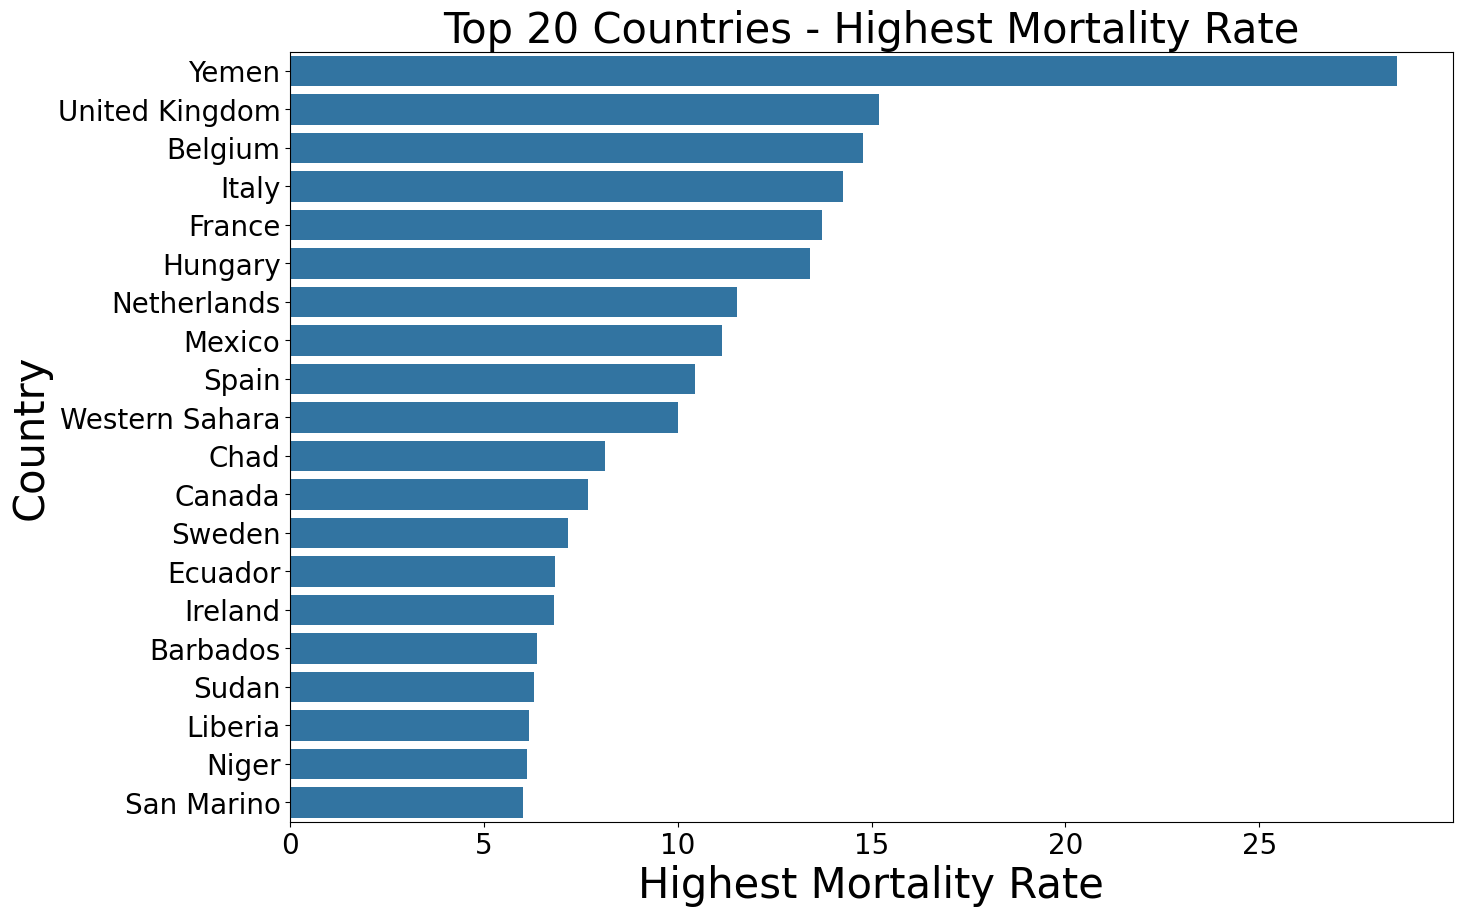

In [42]:
plt.figure(figsize=(15,10))
plt.title('Top 20 Countries - Highest Mortality Rate', fontsize=30)
sns.barplot(x=worst_mortality['death percentage'], y=worst_mortality.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Highest Mortality Rate',fontsize=30)
plt.ylabel('Country',fontsize=30)

In [43]:
### top 20 countries with lowest mortality rate
worst_mortality=country_summary.nsmallest(20,'death percentage').reset_index(drop=True)
worst_mortality

country  confirmed  active  deaths  recovered  \
0                             Bhutan         99      13       0         86   
1                           Cambodia        226      79       0        147   
2                           Dominica         18       0       0         18   
3                            Eritrea        265      74       0        191   
4                               Fiji         27       9       0         18   
5                          Greenland         14       1       0         13   
6                            Grenada         23       0       0         23   
7                           Holy See         12       0       0         12   
8                               Laos         20       1       0         19   
9                           Mongolia        289      67       0        222   
10                  Papua New Guinea         62      51       0         11   
11             Saint Kitts and Nevis         17       2       0         15   
12                       Saint Lucia         24       2       0         22   
13  Saint Vincent and the Grenadines         52      13       0         39   
14                        Seychelles        114      75       0         39   
15                       Timor-Leste         24      24       0          0   
16                           Vietnam        431      66       0        365   
17                         Singapore      50838    5119      27      45692   
18                             Qatar     109597    3104     165     106328   
19                            Uganda       1128     140       2        986   

    recovery percentage  death percentage  
0                 86.87              0.00  
1                 65.04              0.00  
2                100.00              0.00  
3                 72.08              0.00  
4                 66.67              0.00  
5                 92.86              0.00  
6                100.00              0.00  
7                100.00              0.00  
8                 95.00              0.00  
9                 76.82              0.00  
10                17.74              0.00  
11                88.24              0.00  
12                91.67              0.00  
13                75.00              0.00  
14                34.21              0.00  
15                 0.00              0.00  
16                84.69              0.00  
17                89.88              0.05  
18                97.02              0.15  
19                87.41              0.18

# Top 20 countries having the highest and lowest recovery rate :

In [44]:
best_recovery=country_summary.nlargest(20,'recovery percentage').reset_index(drop=True)
best_recovery

country  confirmed  active  deaths  recovered  recovery percentage  \
0        Dominica         18       0       0         18               100.00   
1         Grenada         23       0       0         23               100.00   
2        Holy See         12       0       0         12               100.00   
3        Djibouti       5059      24      58       4977                98.38   
4         Iceland       1854      21      10       1823                98.33   
5          Brunei        141       0       3        138                97.87   
6     New Zealand       1557      21      22       1514                97.24   
7           Qatar     109597    3104     165     106328                97.02   
8        Malaysia       8904     179     124       8601                96.60   
9       Mauritius        344       2      10        332                96.51   
10         Norway       9132     125     255       8752                95.84   
11        Taiwan*        462      15       7        440                95.24   
12           Laos         20       1       0         19                95.00   
13          Malta        701      27       9        665                94.86   
14        Estonia       2034      42      69       1923                94.54   
15       Thailand       3297     128      58       3111                94.36   
16  Liechtenstein         86       4       1         81                94.19   
17     San Marino        699       0      42        657                93.99   
18        Finland       7398     149     329       6920                93.54   
19      Greenland         14       1       0         13                92.86   

    death percentage  
0               0.00  
1               0.00  
2               0.00  
3               1.15  
4               0.54  
5               2.13  
6               1.41  
7               0.15  
8               1.39  
9               2.91  
10              2.79  
11              1.52  
12              0.00  
13              1.28  
14              3.39  
15              1.76  
16              1.16  
17              6.01  
18              4.45  
19              0.00

Text(0, 0.5, 'Country')

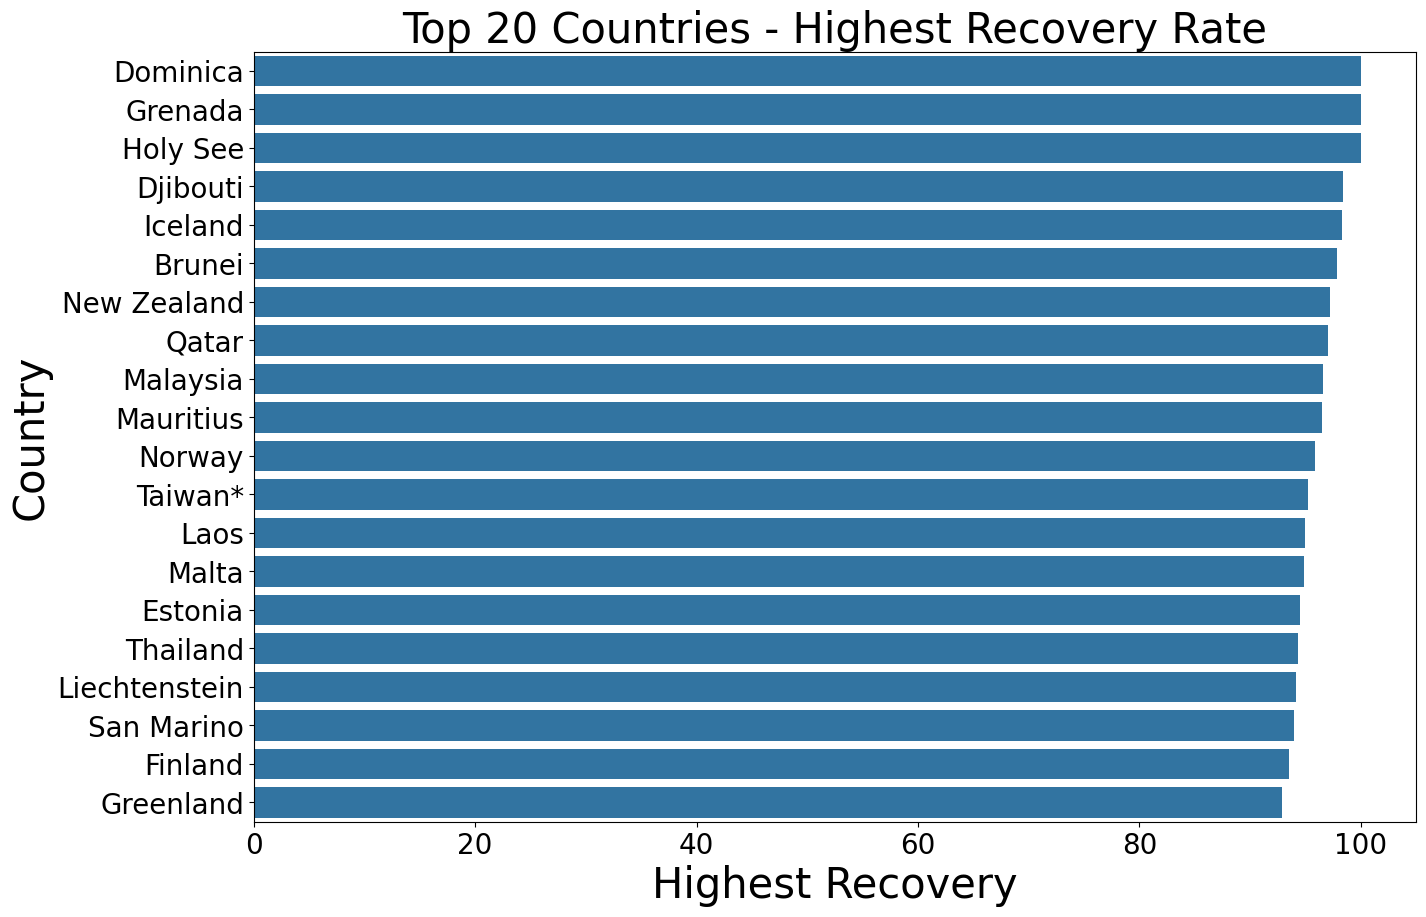

In [45]:
plt.figure(figsize=(15,10))
plt.title('Top 20 Countries - Highest Recovery Rate', fontsize=30)
sns.barplot(x=best_recovery['recovery percentage'], y=best_recovery.country)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Highest Recovery',fontsize=30)
plt.ylabel('Country',fontsize=30)

In [46]:
lowest_recovery=country_summary.nsmallest(20,'recovery percentage').reset_index(drop=True)
lowest_recovery

country  confirmed  active  deaths  recovered  \
0                Canada     116458  107514    8944          0   
1            Mozambique       1701    1690      11          0   
2                Serbia      24141   23598     543          0   
3                Sweden      79395   73695    5700          0   
4                 Syria        674     634      40          0   
5           Timor-Leste         24      24       0          0   
6           Netherlands      53413   47064    6160        189   
7        United Kingdom     301708  254427   45844       1437   
8               Namibia       1843    1734       8        101   
9              Botswana        739     674       2         63   
10             Honduras      39741   33536    1166       5039   
11     Papua New Guinea         62      51       0         11   
12             Zimbabwe       2704    2126      36        542   
13               Gambia        326     252       8         66   
14                Libya       2827    2186      64        577   
15              Bahamas        382     280      11         91   
16           Costa Rica      15841   11902     115       3824   
17              Lesotho        505     365      12        128   
18               Angola        950     667      41        242   
19  Congo (Brazzaville)       3200    2317      54        829   

    recovery percentage  death percentage  
0                  0.00              7.68  
1                  0.00              0.65  
2                  0.00              2.25  
3                  0.00              7.18  
4                  0.00              5.93  
5                  0.00              0.00  
6                  0.35             11.53  
7                  0.48             15.19  
8                  5.48              0.43  
9                  8.53              0.27  
10                12.68              2.93  
11                17.74              0.00  
12                20.04              1.33  
13                20.25              2.45  
14                20.41              2.26  
15                23.82              2.88  
16                24.14              0.73  
17                25.35              2.38  
18                25.47              4.32  
19                25.91              1.69

# ANALYSIS WITH PROPHET FOR PREDICTION OF CONFIRMED CASES

In [47]:
data.groupby('date').sum().head()

lat         long  confirmed  deaths  recovered  active
date                                                                     
2020-01-22  5594.20365  6140.869714        555      17         28     510
2020-01-23  5594.20365  6140.869714        654      18         30     606
2020-01-24  5594.20365  6140.869714        941      26         36     879
2020-01-25  5594.20365  6140.869714       1434      42         39    1353
2020-01-26  5594.20365  6140.869714       2118      56         52    2010

In [48]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()

In [49]:
confirmed.head()

date  confirmed
0 2020-01-22        555
1 2020-01-23        654
2 2020-01-24        941
3 2020-01-25       1434
4 2020-01-26       2118

In [50]:
confirmed.tail()

date  confirmed
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

In [51]:
confirmed.columns = ['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()

ds         y
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

In [52]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

20:36:15 - cmdstanpy - INFO - Chain [1] start processing
20:36:15 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future =m.make_future_dataframe(periods=7,freq='D')
future.head()

ds
0 2020-01-22
1 2020-01-23
2 2020-01-24
3 2020-01-25
4 2020-01-26

In [54]:
future.tail()

ds
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [55]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -2.044339e+04 -1.789401e+05  1.459013e+05
1   2020-01-23 -7.841899e+03 -1.746553e+05  1.484339e+05
2   2020-01-24  6.024571e+03 -1.645455e+05  1.742503e+05
3   2020-01-25  1.240772e+04 -1.391793e+05  1.730319e+05
4   2020-01-26  8.645679e+03 -1.482539e+05  1.719441e+05
..         ...           ...           ...           ...
190 2020-07-30  1.674387e+07  1.658525e+07  1.690328e+07
191 2020-07-31  1.695904e+07  1.678797e+07  1.710870e+07
192 2020-08-01  1.716673e+07  1.700407e+07  1.734470e+07
193 2020-08-02  1.736428e+07  1.719027e+07  1.754551e+07
194 2020-08-03  1.755891e+07  1.737175e+07  1.773573e+07

[195 rows x 4 columns]

In [56]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -9.445493e+03 -1.789401e+05  1.459013e+05 -9.445493e+03   
1   2020-01-23 -6.740790e+03 -1.746553e+05  1.484339e+05 -6.740790e+03   
2   2020-01-24 -4.036087e+03 -1.645455e+05  1.742503e+05 -4.036087e+03   
3   2020-01-25 -1.331384e+03 -1.391793e+05  1.730319e+05 -1.331384e+03   
4   2020-01-26  1.373319e+03 -1.482539e+05  1.719441e+05  1.373319e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  1.674497e+07  1.658525e+07  1.690328e+07  1.671795e+07   
191 2020-07-31  1.694898e+07  1.678797e+07  1.710870e+07  1.690549e+07   
192 2020-08-01  1.715300e+07  1.700407e+07  1.734470e+07  1.709316e+07   
193 2020-08-02  1.735701e+07  1.719027e+07  1.754551e+07  1.727726e+07   
194 2020-08-03  1.756102e+07  1.737175e+07  1.773573e+07  1.745254e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -9.445493e+03   -10997.897085         -10997.897085         -10997.897085   
1   -6.740790e+03    -1101.108996          -1101.108996          -1101.108996   
2   -4.036087e+03    10060.657719          10060.657719          10060.657719   
3   -1.331384e+03    13739.103217          13739.103217          13739.103217   
4    1.373319e+03     7272.359551           7272.359551           7272.359551   
..            ...             ...                   ...                   ...   
190  1.677268e+07    -1101.108996          -1101.108996          -1101.108996   
191  1.699445e+07    10060.657719          10060.657719          10060.657719   
192  1.721601e+07    13739.103217          13739.103217          13739.103217   
193  1.743694e+07     7272.359551           7272.359551           7272.359551   
194  1.765672e+07    -2109.410773          -2109.410773          -2109.410773   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -10997.897085 -10997.897085 -10997.897085                   0.0   
1    -1101.108996  -1101.108996  -1101.108996                   0.0   
2    10060.657719  10060.657719  10060.657719                   0.0   
3    13739.103217  13739.103217  13739.103217                   0.0   
4     7272.359551   7272.359551   7272.359551                   0.0   
..            ...           ...           ...                   ...   
190  -1101.108996  -1101.108996  -1101.108996                   0.0   
191  10060.657719  10060.657719  10060.657719                   0.0   
192  13739.103217  13739.103217  13739.103217                   0.0   
193   7272.359551   7272.359551   7272.359551                   0.0   
194  -2109.410773  -2109.410773  -2109.410773                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -2.044339e+04  
1                           0.0                         0.0 -7.841899e+03  
2                           0.0                         0.0  6.024571e+03  
3                           0.0                         0.0  1.240772e+04  
4                           0.0                         0.0  8.645679e+03  
..                          ...                         ...           ...  
190                         0.0                         0.0  1.674387e+07  
191                         0.0                         0.0  1.695904e+07  
192                         0.0                         0.0  1.716673e+07  
193                         0.0                         0.0  1.736428e+07  
194                         0.0                         0.0  1.755891e+07  

[195 rows x 16 columns]

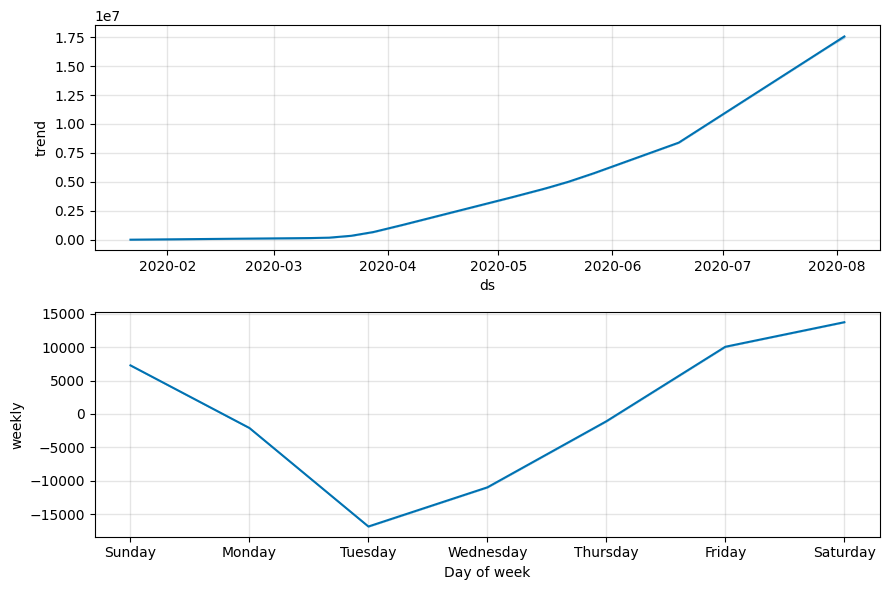

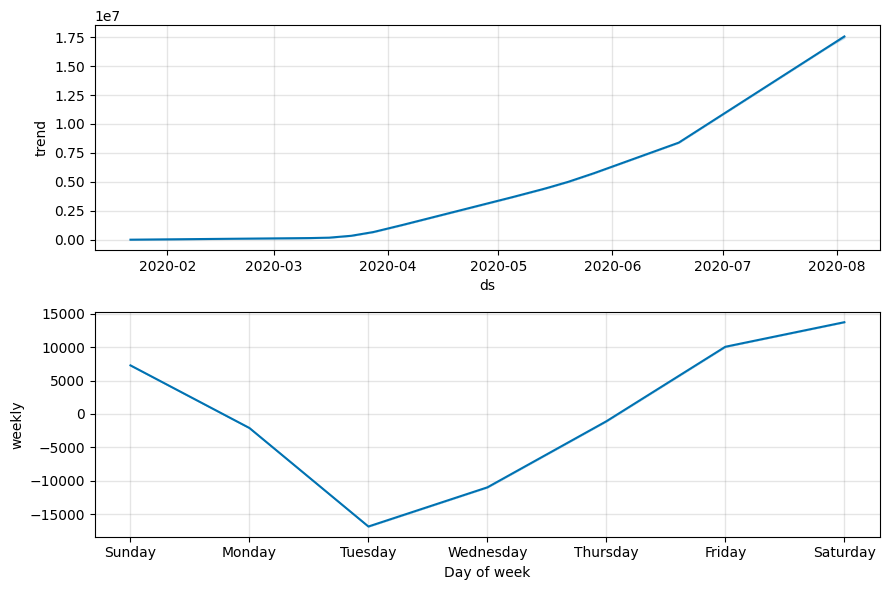

In [57]:
m.plot_components(forecast)

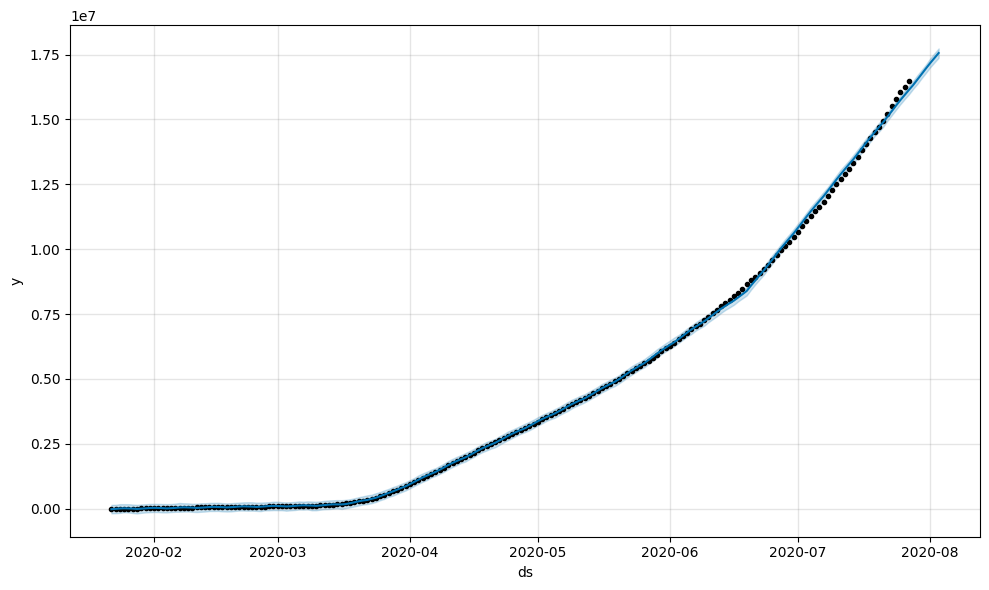

In [58]:
confirmed_forecast_plot = m.plot(forecast)